In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# POLYNOMIAL REGRESSION

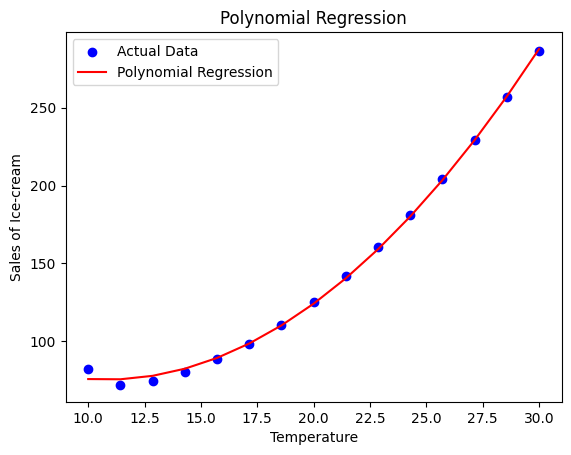

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Loading the Dataset
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Lab on ml/Ice-cream_Sales_Dataset.csv")
dataset

#Extracting the values using iloc function from the above the dataset
temperature = dataset.iloc[:, :-1].values
sales_of_ice_cream = dataset.iloc[:, -1].values

# Reshape the data for sklearn
temperature = temperature.reshape(-1, 1)

# Create polynomial features
degree = 2  # quadratic regression
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(temperature)

# Fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, sales_of_ice_cream)

# Predict the sales for the original temperatures
sales_prediction = poly_model.predict(X_poly)

# Plot the results
plt.scatter(temperature, sales_of_ice_cream, color='blue', label='Actual Data')
plt.plot(temperature, sales_prediction, color='red', label='Polynomial Regression')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Sales of Ice-cream')
plt.legend()
plt.show()

# Unseen Data
- <h2>Only Positive Values

Unseen Temperature:
[31.428571 32.857143 34.285714 35.714286 37.142857 38.571429 40.
 41.428571 42.857143 44.285714 45.714286 47.142857 48.571429 50.
 51.428571]

Predicted Sales of Ice-cream:
[ 320.68089932  355.86410348  393.40195597  433.29450936  475.5417078
  520.14361042  567.1001548   616.41137132  668.07729697  722.09785943
  778.47313432  837.20304272  898.28766685  961.72692119 1027.52084767]


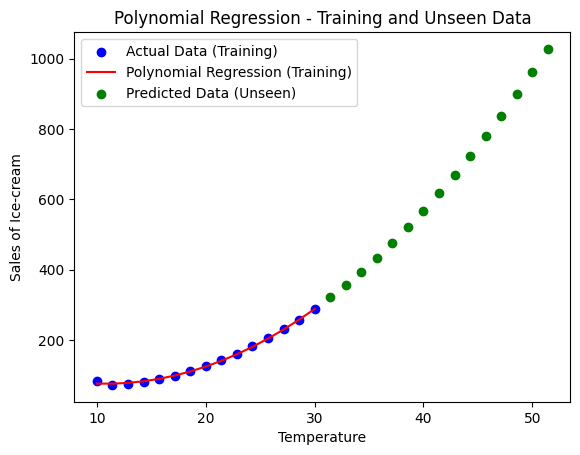

In [10]:
# Unseen dataset
unseen_temperature = np.array([31.428571, 32.857143, 34.285714, 35.714286, 37.142857,
                               38.571429, 40.000000, 41.428571, 42.857143, 44.285714,
                               45.714286, 47.142857, 48.571429, 50.000000, 51.428571])

# Reshape the data for sklearn
unseen_temperature = unseen_temperature.reshape(-1, 1)

# Create polynomial features for the unseen data
X_unseen_poly = poly_features.transform(unseen_temperature)

# Predict the sales for the unseen temperatures using the trained model
sales_prediction_unseen = poly_model.predict(X_unseen_poly)

# Display the unseen dataset and predicted sales
print("Unseen Temperature:")
print(unseen_temperature.flatten())
print("\nPredicted Sales of Ice-cream:")
print(sales_prediction_unseen)

# Plot the results for the training and unseen datasets
plt.scatter(temperature, sales_of_ice_cream, color='blue', label='Actual Data (Training)')
plt.plot(temperature, poly_model.predict(X_poly), color='red', label='Polynomial Regression (Training)')

# Plot the predicted sales for the unseen temperatures
plt.scatter(unseen_temperature, sales_prediction_unseen, color='green', label='Predicted Data (Unseen)')

plt.title('Polynomial Regression - Training and Unseen Data')
plt.xlabel('Temperature')
plt.ylabel('Sales of Ice-cream')
plt.legend()
plt.show()


- <h2>Negative Values (included)

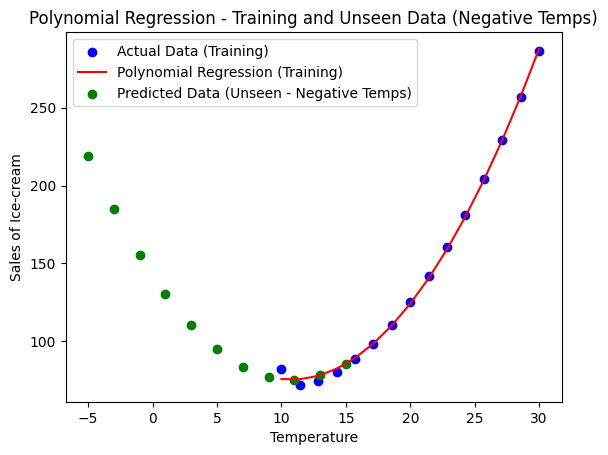

In [11]:
# Unseen dataset with negative temperatures
unseen_temperature_negative = np.array([-5.0, -3.0, -1.0, 1.0, 3.0, 5.0, 7.0, 9.0, 11.0, 13.0, 15.0])

# Reshape the data for sklearn
unseen_temperature_negative = unseen_temperature_negative.reshape(-1, 1)

# Create polynomial features for the unseen data
X_unseen_poly_negative = poly_features.transform(unseen_temperature_negative)

# Predict the sales for the unseen temperatures using the trained model
sales_prediction_unseen_negative = poly_model.predict(X_unseen_poly_negative)

# Plot the results for the training and unseen datasets
plt.scatter(temperature, sales_of_ice_cream, color='blue', label='Actual Data (Training)')
plt.plot(temperature, poly_model.predict(X_poly), color='red', label='Polynomial Regression (Training)')
plt.scatter(unseen_temperature_negative, sales_prediction_unseen_negative, color='green', label='Predicted Data (Unseen - Negative Temps)')
plt.title('Polynomial Regression - Training and Unseen Data (Negative Temps)')
plt.xlabel('Temperature')
plt.ylabel('Sales of Ice-cream')
plt.legend()
plt.show()

- Over here we can see that based on the degree of polynomial that we have choosen (2), the shape of the graph is a parabola.
- Not "realistic"

# Updated Dataset
- <h3>Using Polynomial regression of degree 3.

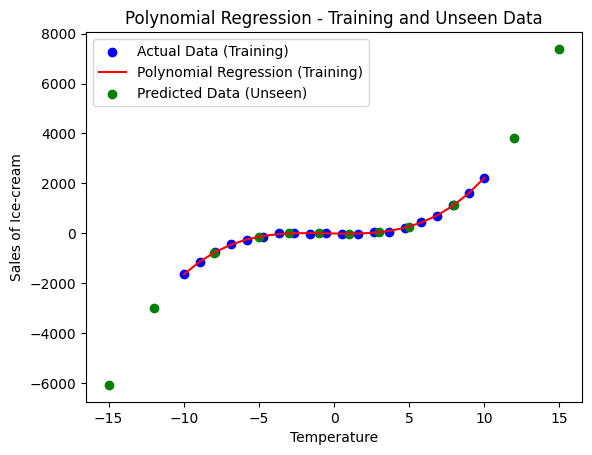

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate synthetic dataset with a cubic relationship
np.random.seed(42)
temperature = np.linspace(-10, 10, 20)
sales_of_ice_cream = 2 * temperature**3 + 3 * temperature**2 - 5 * temperature + np.random.normal(0, 30, 20)

# Reshape the data for sklearn
temperature = temperature.reshape(-1, 1)

# Create polynomial features
degree = 3  # cubic regression
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(temperature)

# Fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, sales_of_ice_cream)

# Unseen dataset with both positive and negative temperatures
unseen_temperature = np.array([-15.0, -12.0, -8.0, -5.0, -3.0, -1.0, 1.0, 3.0, 5.0, 8.0, 12.0, 15.0])

# Reshape the data for sklearn
unseen_temperature = unseen_temperature.reshape(-1, 1)

# Create polynomial features for the unseen data
X_unseen_poly = poly_features.transform(unseen_temperature)

# Predict the sales for the unseen temperatures using the trained model
sales_prediction_unseen = poly_model.predict(X_unseen_poly)

# Plot the results for the training and unseen datasets
plt.scatter(temperature, sales_of_ice_cream, color='blue', label='Actual Data (Training)')
plt.plot(temperature, poly_model.predict(X_poly), color='red', label='Polynomial Regression (Training)')
plt.scatter(unseen_temperature, sales_prediction_unseen, color='green', label='Predicted Data (Unseen)')
plt.title('Polynomial Regression - Training and Unseen Data')
plt.xlabel('Temperature')
plt.ylabel('Sales of Ice-cream')
plt.legend()
plt.show()
#(dataset.info(), dataset.describe(), dataset.dtypes(), dataset.columns(), dataset.shape

In [18]:
dataset.dtypes

Temperature           float64
Sales_of_Ice_cream    float64
dtype: object

In [19]:
dataset.columns

Index(['Temperature', 'Sales_of_Ice_cream'], dtype='object')

In [20]:
dataset.shape

(15, 2)